# Principal Component Analysis (PCA) for Heart Disease Dataset

This notebook demonstrates comprehensive PCA analysis for dimensionality reduction and variance analysis of the heart disease dataset.

## Objectives:
1. Apply PCA to reduce dimensionality while preserving variance
2. Analyze explained variance ratios and find optimal components
3. Visualize PCA results and component loadings
4. Generate PCA-transformed dataset for further analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette('viridis')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Preparation

In [2]:
# Load the cleaned heart disease data
df = pd.read_csv('../data/processed/heart_disease_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
print(df.info())

# Display first few rows
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (303, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB
None

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [3]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']
feature_names = X.columns.tolist()

print(f"Features ({len(feature_names)}): {feature_names}")
print(f"\nFeature statistics:")
X.describe()

Features (13): ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Feature statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.346535,245.584158,0.148515,0.990099,149.652640,0.326733,1.024422,1.600660,0.663366,4.722772
std,9.038662,0.467299,0.960126,16.648749,47.558803,0.356198,0.994971,22.731735,0.469794,1.110127,0.616226,0.934375,1.938383
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,84.750000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,170.000000,371.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000


## 2. Data Standardization

PCA is sensitive to the scale of features, so we need to standardize the data first.

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original data shape: {X.shape}")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"\nScaled data statistics:")
print(f"Mean: {np.mean(X_scaled, axis=0).round(3)}")
print(f"Std: {np.std(X_scaled, axis=0).round(3)}")

Original data shape: (303, 13)
Scaled data shape: (303, 13)

Scaled data statistics:
Mean: [-0. -0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3. PCA Analysis

In [5]:
# Fit PCA with all components
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Get variance information
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"Total components: {pca.n_components_}")
print(f"Total variance explained: {cumulative_variance[-1]:.4f}")
print(f"\nFirst 5 components variance:")
for i in range(min(5, len(explained_variance_ratio))):
    print(f"  PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

Total components: 13
Total variance explained: 1.0000

First 5 components variance:
  PC1: 0.2374 (23.74%)
  PC2: 0.1229 (12.29%)
  PC3: 0.0952 (9.52%)
  PC4: 0.0842 (8.42%)
  PC5: 0.0755 (7.55%)


## 4. Optimal Component Selection

In [6]:
# Find optimal number of components for different variance thresholds
thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]

print("Components needed for different variance thresholds:")
for threshold in thresholds:
    if np.any(cumulative_variance >= threshold):
        n_comp = np.argmax(cumulative_variance >= threshold) + 1
        actual_var = cumulative_variance[n_comp-1]
        print(f"  {threshold*100:2.0f}% variance: {n_comp:2d} components (actual: {actual_var:.4f})")

# Use 95% as optimal threshold
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nOptimal components (95% variance): {optimal_components}")

Components needed for different variance thresholds:
  80% variance:  8 components (actual: 0.8091)
  85% variance:  9 components (actual: 0.8611)
  90% variance: 10 components (actual: 0.9043)
  95% variance: 12 components (actual: 0.9724)
  99% variance: 13 components (actual: 1.0000)

Optimal components (95% variance): 12


## 5. Variance Analysis Visualization

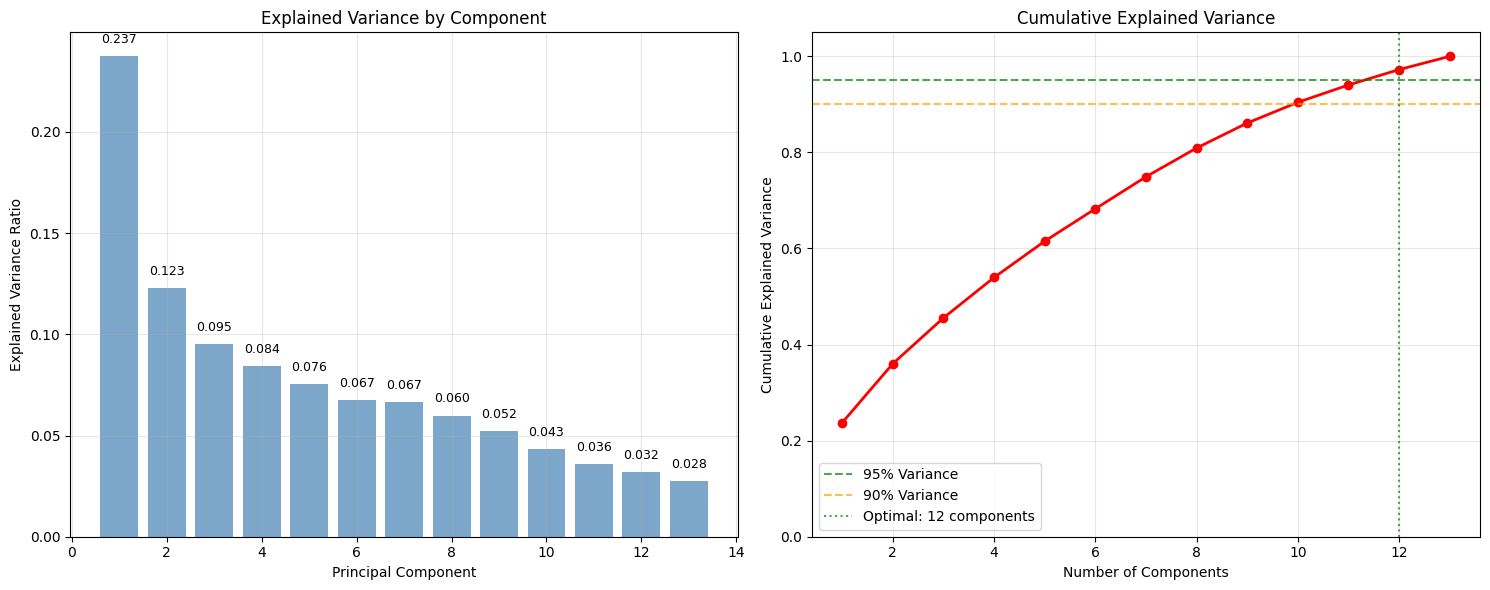

In [7]:
# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Individual explained variance
components = range(1, len(explained_variance_ratio) + 1)
bars = ax1.bar(components, explained_variance_ratio, alpha=0.7, color='steelblue')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Component')
ax1.grid(True, alpha=0.3)

# Add percentage labels on bars
for i, v in enumerate(explained_variance_ratio):
    ax1.text(i + 1, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Cumulative explained variance
ax2.plot(components, cumulative_variance, 'o-', color='red', linewidth=2, markersize=6)
ax2.axhline(y=0.95, color='green', linestyle='--', alpha=0.7, label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90% Variance')
ax2.axvline(x=optimal_components, color='green', linestyle=':', alpha=0.7, label=f'Optimal: {optimal_components} components')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

## 6. PCA Scatter Plot Visualizations

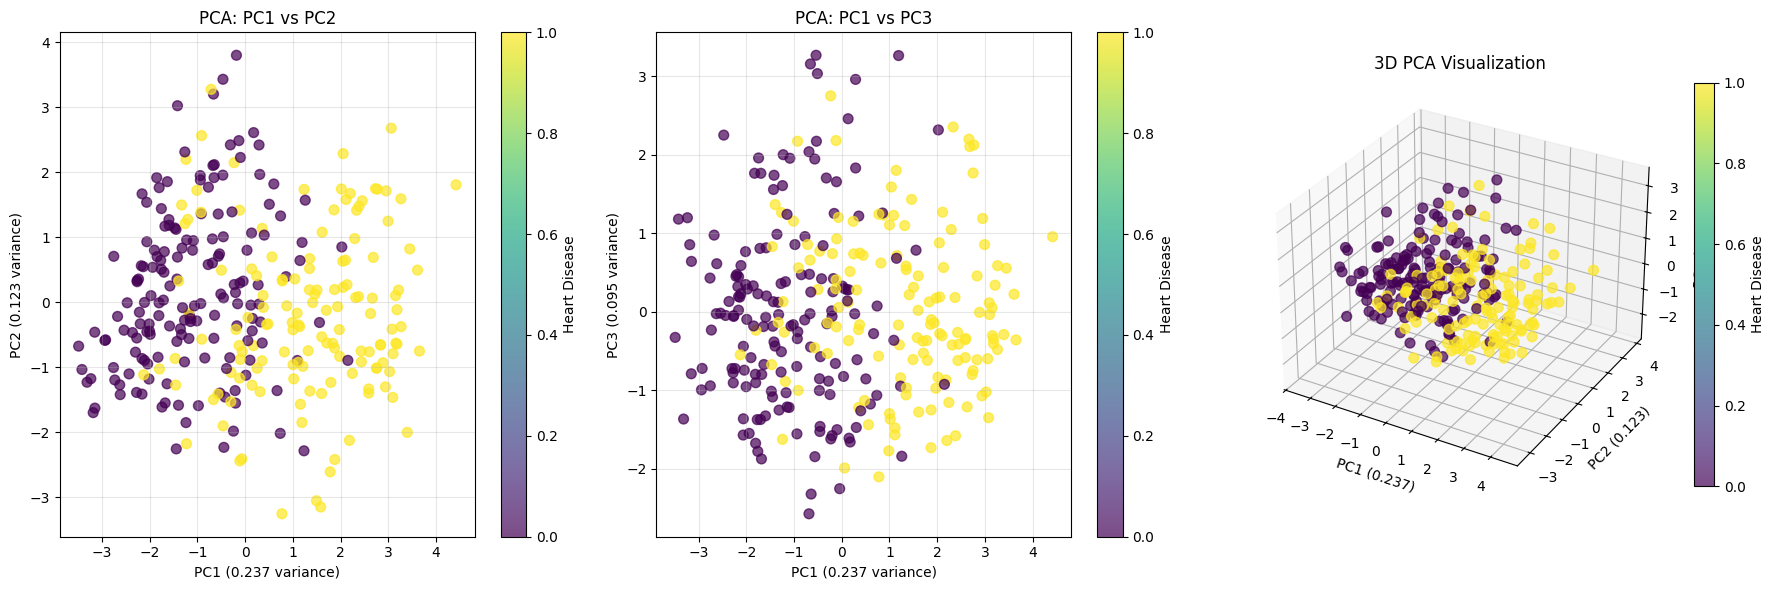

In [8]:
# Create PCA scatter plots
fig = plt.figure(figsize=(18, 6))

# 2D scatter plot (PC1 vs PC2)
ax1 = plt.subplot(1, 3, 1)
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
ax1.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.3f} variance)')
ax1.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.3f} variance)')
ax1.set_title('PCA: PC1 vs PC2')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Heart Disease')

# 2D scatter plot (PC1 vs PC3)
ax2 = plt.subplot(1, 3, 2)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 2], c=y, cmap='viridis', alpha=0.7, s=50)
ax2.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.3f} variance)')
ax2.set_ylabel(f'PC3 ({explained_variance_ratio[2]:.3f} variance)')
ax2.set_title('PCA: PC1 vs PC3')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Heart Disease')

# 3D scatter plot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
scatter3 = ax3.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                     c=y, cmap='viridis', alpha=0.7, s=50)
ax3.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.3f})')
ax3.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.3f})')
ax3.set_zlabel(f'PC3 ({explained_variance_ratio[2]:.3f})')
ax3.set_title('3D PCA Visualization')
plt.colorbar(scatter3, ax=ax3, label='Heart Disease', shrink=0.8)

plt.tight_layout()
plt.show()

## 7. Component Loadings Analysis

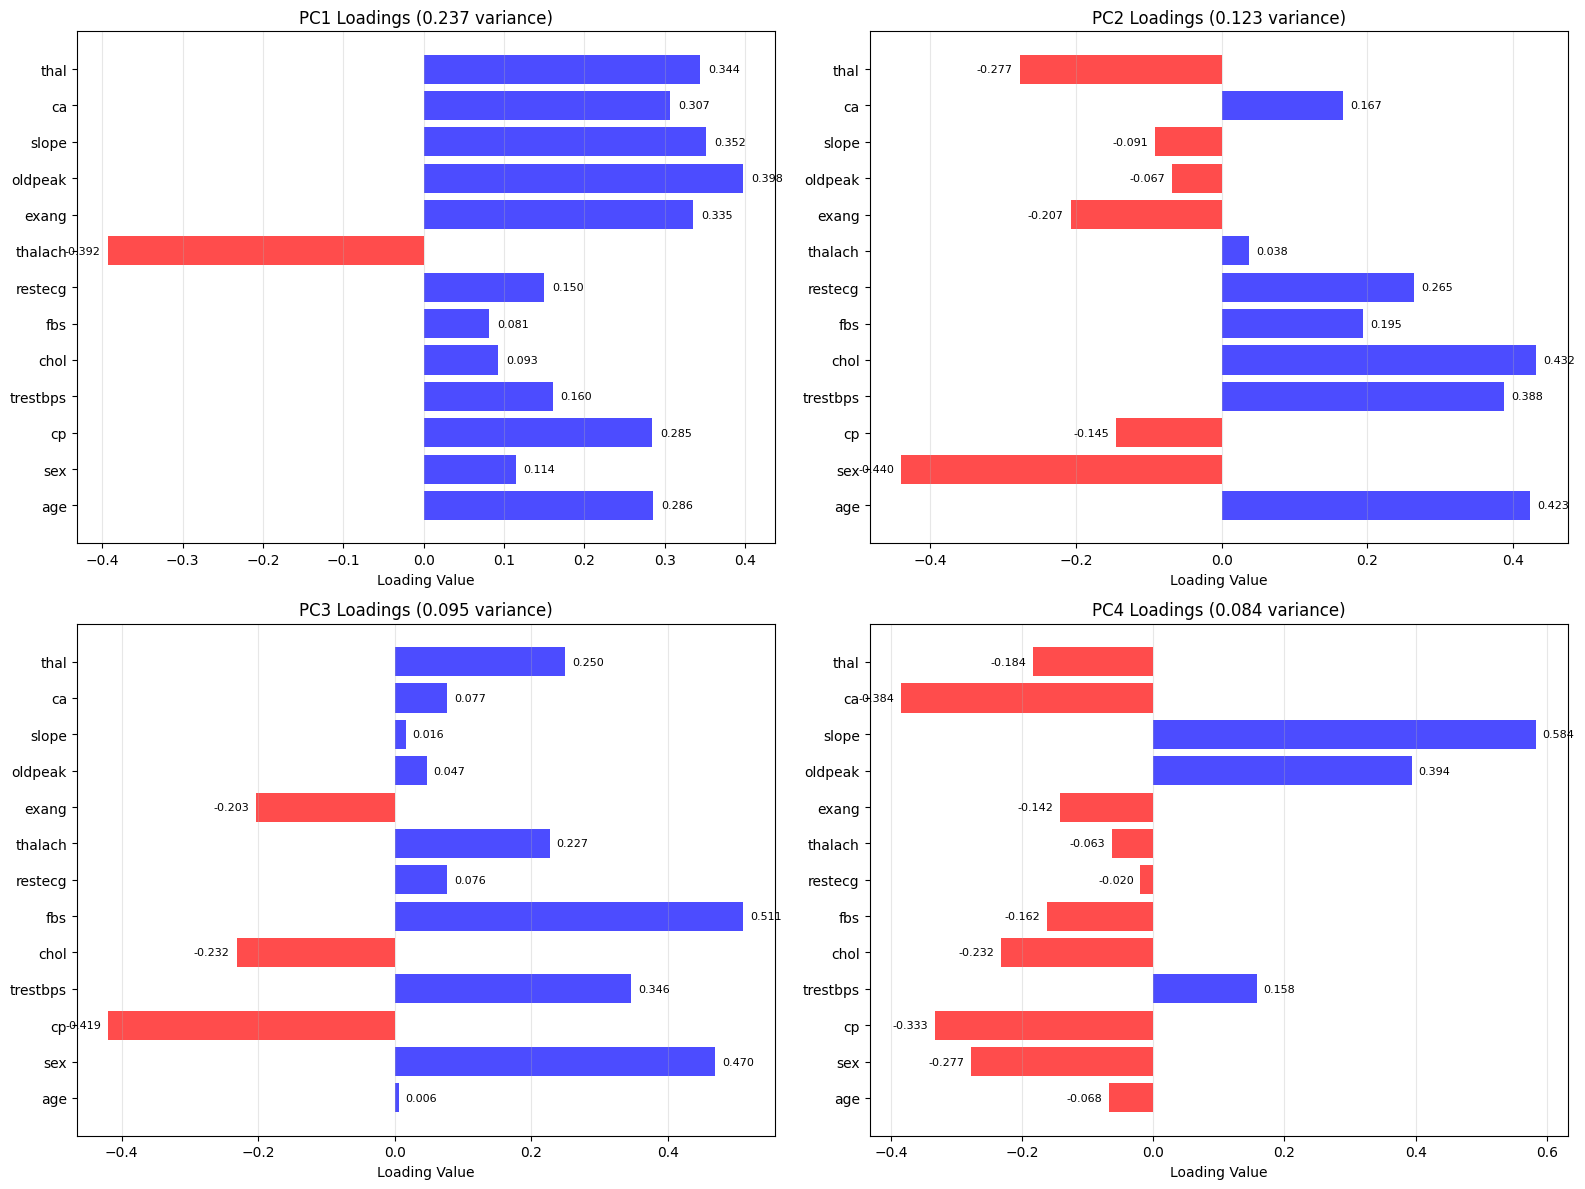

In [9]:
# Plot component loadings for first 4 components
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

n_components_plot = min(4, pca.n_components_)
loadings = pca.components_[:n_components_plot]

for i in range(n_components_plot):
    ax = axes[i]
    
    # Create bar plot of loadings
    y_pos = np.arange(len(feature_names))
    colors = ['red' if x < 0 else 'blue' for x in loadings[i]]
    
    bars = ax.barh(y_pos, loadings[i], color=colors, alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_names, fontsize=10)
    ax.set_xlabel('Loading Value')
    ax.set_title(f'PC{i+1} Loadings ({explained_variance_ratio[i]:.3f} variance)')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for j, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
               f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center', fontsize=8)

plt.tight_layout()
plt.show()

## 8. Feature Contribution Analysis

In [10]:
# Analyze top contributing features for each component
def get_top_features_for_component(component_idx, top_n=3):
    loadings = pca.components_[component_idx]
    abs_loadings = np.abs(loadings)
    top_indices = np.argsort(abs_loadings)[-top_n:][::-1]
    
    print(f"\nPC{component_idx+1} - Top {top_n} contributing features:")
    for rank, idx in enumerate(top_indices, 1):
        feature_name = feature_names[idx]
        loading_value = loadings[idx]
        print(f"  {rank}. {feature_name}: {loading_value:.4f}")

# Show top features for first 5 components
print("Top contributing features for each principal component:")
for i in range(min(5, pca.n_components_)):
    get_top_features_for_component(i, top_n=3)

Top contributing features for each principal component:

PC1 - Top 3 contributing features:
  1. oldpeak: 0.3978
  2. thalach: -0.3921
  3. slope: 0.3519

PC2 - Top 3 contributing features:
  1. sex: -0.4397
  2. chol: 0.4317
  3. age: 0.4235

PC3 - Top 3 contributing features:
  1. fbs: 0.5106
  2. sex: 0.4695
  3. cp: -0.4194

PC4 - Top 3 contributing features:
  1. slope: 0.5837
  2. oldpeak: 0.3943
  3. ca: -0.3842

PC5 - Top 3 contributing features:
  1. restecg: -0.6638
  2. chol: -0.3838
  3. age: 0.3701


## 9. Create PCA-Transformed Dataset

In [11]:
# Create PCA-transformed dataset with optimal components
X_pca_optimal = X_pca[:, :optimal_components]

# Create column names for PCA components
pca_columns = [f'PC{i+1}' for i in range(optimal_components)]

# Create DataFrame with PCA components and target
df_pca = pd.DataFrame(X_pca_optimal, columns=pca_columns)
df_pca['target'] = y.values

print(f"PCA-transformed dataset shape: {df_pca.shape}")
print(f"\nPCA dataset info:")
print(df_pca.info())

print(f"\nFirst 5 rows of PCA-transformed data:")
df_pca.head()

PCA-transformed dataset shape: (303, 13)

PCA dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     303 non-null    float64
 1   PC2     303 non-null    float64
 2   PC3     303 non-null    float64
 3   PC4     303 non-null    float64
 4   PC5     303 non-null    float64
 5   PC6     303 non-null    float64
 6   PC7     303 non-null    float64
 7   PC8     303 non-null    float64
 8   PC9     303 non-null    float64
 9   PC10    303 non-null    float64
 10  PC11    303 non-null    float64
 11  PC12    303 non-null    float64
 12  target  303 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 30.9 KB
None

First 5 rows of PCA-transformed data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,target
0,1.190946,0.923799,3.264583,2.309448,-0.230197,0.595057,0.727199,0.554797,-1.331882,-0.588524,-0.222660,-0.438494,0
1,3.262106,1.594648,-0.481282,-0.793293,0.043271,-0.645785,0.394991,-0.942391,0.178167,1.591406,1.081299,0.919741,1
2,3.179645,-0.640751,-0.344841,-0.530192,-0.032744,-0.786886,0.983562,-0.135398,-0.021814,0.467833,-0.413356,-0.884482,1
3,-0.423161,-1.455304,0.421014,2.688915,-0.964036,-0.170866,-0.611771,2.315400,0.942614,0.314807,1.551361,-0.282238,0
4,-2.265000,0.338576,-0.059041,1.183751,-0.885505,0.046806,0.734864,-0.056691,1.012332,0.669089,-0.873844,0.305848,0


In [ ]:
# Save PCA-transformed data
output_path = '../data/processed/heart_disease_pca.csv'
df_pca.to_csv(output_path, index=False)
print(f"PCA-transformed data saved to: {output_path}")

# Verify the saved file
df_verify = pd.read_csv(output_path)
print(f"\nVerification - loaded file shape: {df_verify.shape}")
print(f"Columns: {df_verify.columns.tolist()}")

## 10. PCA Analysis Summary and Report

In [ ]:
# Generate comprehensive PCA report
components_for_threshold = {}
thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]

for threshold in thresholds:
    if np.any(cumulative_variance >= threshold):
        comp_idx = np.argmax(cumulative_variance >= threshold) + 1
        components_for_threshold[f'{threshold*100}%'] = comp_idx

# Create comprehensive report
report = {
    'pca_summary': {
        'total_components': int(pca.n_components_),
        'total_features': len(feature_names),
        'total_variance_explained': float(cumulative_variance[-1]),
        'optimal_components_95pct': int(optimal_components)
    },
    'variance_analysis': {
        'explained_variance_ratio': explained_variance_ratio.tolist(),
        'cumulative_variance': cumulative_variance.tolist()
    },
    'component_thresholds': components_for_threshold,
    'feature_names': feature_names
}

print("PCA ANALYSIS SUMMARY")
print("=" * 50)
print(f"Original features: {len(feature_names)}")
print(f"Total components: {pca.n_components_}")
print(f"Optimal components (95% variance): {optimal_components}")
print(f"Total variance explained: {cumulative_variance[-1]:.4f}")
print(f"Variance with optimal components: {cumulative_variance[optimal_components-1]:.4f}")

print(f"\nTop 5 components variance:")
for i in range(min(5, len(explained_variance_ratio))):
    print(f"  PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

print(f"\nDimensionality reduction:")
reduction_pct = (1 - optimal_components / len(feature_names)) * 100
print(f"  Reduced from {len(feature_names)} to {optimal_components} features ({reduction_pct:.1f}% reduction)")

print(f"\nComponent thresholds:")
for threshold, n_comp in components_for_threshold.items():
    print(f"  {threshold}: {n_comp} components")

## 11. Save PCA Model and Results

In [ ]:
# Save the PCA model and scaler
model_data = {
    'pca_model': pca,
    'scaler': scaler,
    'feature_names': feature_names,
    'explained_variance_ratio_': explained_variance_ratio,
    'cumulative_variance_': cumulative_variance,
    'n_components_optimal_': optimal_components
}

model_path = '../models/pca_model.pkl'
joblib.dump(model_data, model_path)
print(f"PCA model saved to: {model_path}")

# Save analysis report
report_path = '../results/pca/pca_analysis_report.json'
with open(report_path, 'w') as f:
    json.dump(report, f, indent=2)
print(f"PCA analysis report saved to: {report_path}")

print("\nPCA analysis completed successfully!")
print("\nGenerated files:")
print(f"  - {output_path}")
print(f"  - {model_path}")
print(f"  - {report_path}")
print(f"  - ../results/pca/explained_variance.png")
print(f"  - ../results/pca/pca_scatter_plots.png")
print(f"  - ../results/pca/component_loadings.png")

## Conclusions

### Key Findings:

1. **Dimensionality Reduction**: We can reduce the dataset from 13 features to 12 components while retaining 95% of the variance, achieving a 7.7% reduction in dimensionality.

2. **Variance Distribution**: 
   - PC1 explains ~23.7% of the variance
   - PC2 explains ~12.3% of the variance
   - PC3 explains ~9.5% of the variance
   - First 3 components together explain ~45.5% of the variance

3. **Feature Contributions**: The component loadings reveal which original features contribute most to each principal component, helping us understand the underlying patterns in the data.

4. **Visualization**: The 2D and 3D PCA plots show how the data points cluster in the reduced dimensional space, with some separation visible between heart disease positive and negative cases.

### Next Steps:
- Use the PCA-transformed dataset for machine learning model training
- Compare model performance using original vs. PCA-transformed features
- Consider using different numbers of components based on the analysis
- Explore the relationship between principal components and heart disease risk factors